In [117]:
__authors__    = "Luis Angel Gualteros Gil"
__credits__   = ["Luis Angel Gualteros Gil, PhD"]
__copyright_amp__ = "(c) Luis Angel Gualteros Gil"
__email__   = "lagualterosg@correo.udistrital.edu.co"

#Satisfaccion booleana (SAT) con el algoritmos de grover


##Que es SAT?
Es un problema determinar si una fórmula booleana es válida o no. Esto implica que es satisfactoria si el valor de verdad de la fórmula arroja un valor verdad “booleano” es “Verdadero” y se considera no satisfactoria en el caso del valor verdad “booleano” sea “Falso” esto nos da una solución 2^n, n es el número de preposiciones.
Los problemas SAT están escritos en forma normal conjuntiva (FNC) donde un clausula es una disyunción de literales esto implica en que solo en la formula puede aparecer la conjunción (AND) y disyunción (OR) y la negación para expresar las fórmulas.

##Que es el algoritmo de Grover?
El algoritmo de Grover es una algoritmo cuántico para la búsqueda en una secuencia no ordena de datos N elementos en un tiempo O(N^(1/2)), en caso de la computación clásica se realiza un proceso de inspección lineal que necesita O(N). Por lo anterior esto nos indica que al aplicar un procesamiento con este algoritmo podemos reducir el tiempo significativamente.

El algoritmo de Grover está compuesto por su inicialización, oráculo y inversión de la media.

##Cómo funciona SAT? 

Es identificar los valores de verdad la expresión que necesite su análisis con sus valores para cada elemento y para esto se rompiendo primero los paréntesis y después con esos valores identificar el valor se puede determinar su valor de verdad.

##Cómo funciona Grover? 

El algoritmo su inicialización, después es pasado por el oráculo el cual se encarga de cambiar el estado de la solución como se muestran a continuación:


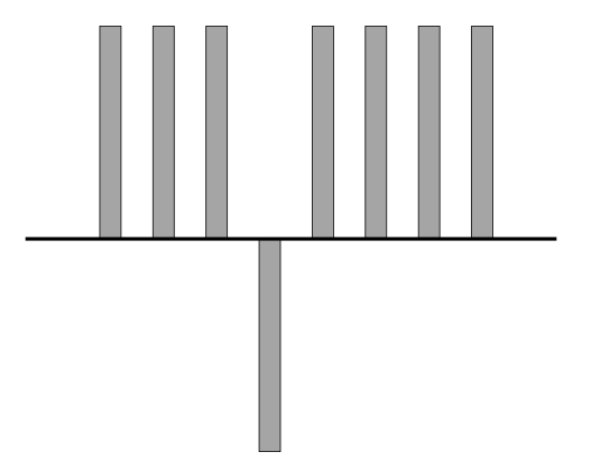

Esto permite después ser tratado por la inversión sobre la media la cual permite a los valores que fueron desviados por el oraculo se muestres valores que tiene más posibles.

##Cuándo fue creado SAT?

Usándonos FNC (forma normal conjunta). En 1960 Martin Davis y Hilary Putnam desarrollaron un algoritmo satisfacibilidad de las fórmulas FNC (forma normal conjunta).

En 1971 por fin se definió los problemas np-complejos y se definió que el SAT era un NP-complejo.

##Cuándo fue creado Grover?
El algoritmo de Grover fue creado en 1996 por Lov Kumar Grover científico informático indio-estadounidense y este algoritmo fue el segundo propuesto para la computación cuántica.

##Donde es aplicado SAT?
Es SAT es principalmente utilizado en las áreas de la informática, pero también en informática teórica, estudio de Algoritmos, entre otros.

##Donde es aplicado Grover?
Se puede en el área de la informática para acelerar algoritmos de NP-complejos y caja negra en la complejidad de la consulta cuántica, incluida la distinción de elementos y el problema de colisión.

##Bibliografia
###Algoritmo de Grover

https://es.wikipedia.org/wiki/Algoritmo_de_Grover#Implementaci%C3%B3n

https://hmong.es/wiki/Grover%27s_algorithm

###Satisfaccion booleana (SAT)
https://kripkit.com/satisfaccin-booleana/

https://www.youtube.com/watch?v=hu7giSFoVP4


#Implementación

In [ ]:
# dependences for ploting solid harmonics
!dpkg --configure -a
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
%matplotlib inline

In [ ]:
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

In [120]:
from qiskit import QuantumCircuit, assemble, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
import numpy as np

##Simulación

Se realizara la implementacion del algoritmo de grover para identificar los posibles valores de verdad del siguiente problema SAT:

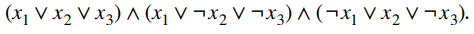

In [121]:
# configuracion
line_init = QuantumRegister(3,'init_data')
line_out = QuantumRegister(1,'out')
line_aux = QuantumRegister(9,'aux')
line_ans = ClassicalRegister(3,'ans')
circuit = QuantumCircuit(line_init,line_out,line_aux,line_ans)

#funciones
#valores iniciales
def initCircuit():
  circuit.x(line_out)
  circuit.h(line_init)
  circuit.h(line_out)
  circuit.barrier()

#las medidas
def measures():
  circuit.barrier()
  circuit.measure(line_init[0],line_ans[0])
  circuit.measure(line_init[1],line_ans[1])
  circuit.measure(line_init[2],line_ans[2])
  circuit.draw()

#el algoritmo de grover
def algorithmGrover():
  circuit.barrier()
  circuit.h(line_init[0:3])
  circuit.x(line_init[0:3])
  circuit.h(line_init[2])
  circuit.ccx(line_init[0],line_init[1],line_init[2])
  circuit.h(line_init[2])
  circuit.x(line_init[0:3])
  circuit.h(line_init[0:3])

#partes similares en el circuito
def partCircuit1():
  circuit.ccx(line_init[0],line_init[1],line_aux[3])
  circuit.ccx(line_init[0],line_init[2],line_aux[3])
  circuit.ccx(line_init[1],line_init[2],line_aux[3])

def partCircuit2():
  circuit.cx(line_init[0],line_aux[4])
  circuit.x(line_init[1])
  circuit.x(line_init[2])
  circuit.x(line_aux[3])
  circuit.x(line_init[1])
  circuit.x(line_aux[3])
  circuit.cx(line_init[1],line_aux[4])
  circuit.cx(line_init[2],line_aux[4])

#El oraculo que permite cambiar el estado solucion para posteriormentes
#para despues ser tratada por el algoritmo de grover 
def oracle():
  circuit.x(line_init[0:2])
  circuit.x(line_aux[3])
  circuit.cx(line_init[0],line_aux[4])
  circuit.cx(line_init[1],line_aux[4])
  circuit.cx(line_init[2],line_aux[4])
  partCircuit1()
  circuit.ccx(line_aux[3],line_aux[4],line_aux[0])
  partCircuit1()
  circuit.x(line_init[0])
  partCircuit2()
  partCircuit1()
  circuit.ccx(line_aux[3],line_aux[4],line_aux[1])
  circuit.ccx(line_init[0],line_init[1],line_aux[3])
  circuit.ccx(line_aux[0],line_aux[1],line_aux[5])
  circuit.ccx(line_init[0],line_init[2],line_aux[3])
  circuit.ccx(line_init[1],line_init[2],line_aux[3])
  circuit.cx(line_init[0],line_aux[4])
  circuit.x(line_init[1])
  circuit.x(line_init[2])
  circuit.x(line_aux[3])
  circuit.cx(line_init[1],line_aux[4])
  circuit.x(line_aux[3])
  circuit.cx(line_init[2],line_aux[4])
  partCircuit1()
  circuit.ccx(line_aux[3],line_aux[4],line_aux[2])
  circuit.ccx(line_init[0],line_init[1],line_aux[3])
  circuit.ccx(line_aux[2],line_aux[5],line_out[0])
  circuit.ccx(line_init[0],line_init[2],line_aux[3])
  circuit.ccx(line_aux[0],line_aux[1],line_aux[5])
  circuit.x(line_init[0])
  circuit.ccx(line_init[1],line_init[2],line_aux[3])
  circuit.cx(line_init[0],line_aux[4])
  circuit.x(line_init[1])
  circuit.x(line_aux[3])
  circuit.cx(line_init[1],line_aux[4])
  circuit.x(line_aux[3])
  circuit.cx(line_init[2],line_aux[4])
  partCircuit1()
  circuit.ccx(line_aux[3],line_aux[4],line_aux[0])
  circuit.ccx(line_init[0],line_init[1],line_aux[3])
  circuit.ccx(line_init[0],line_init[2],line_aux[3])
  circuit.x(line_init[0])
  circuit.ccx(line_init[1],line_init[2],line_aux[3])
  partCircuit2()
  partCircuit1()
  circuit.ccx(line_aux[3],line_aux[4],line_aux[1])
  partCircuit1()
  circuit.cx(line_init[0],line_aux[4])
  circuit.x(line_init[1])
  circuit.x(line_init[2])
  circuit.x(line_aux[3])
  circuit.cx(line_init[1],line_aux[4])
  circuit.x(line_aux[3])
  circuit.cx(line_init[2],line_aux[4])
  partCircuit1()
  circuit.ccx(line_aux[3],line_aux[4],line_aux[2])
  partCircuit1()
  circuit.x(line_aux[3])

#circuito
initCircuit()
oracle()
algorithmGrover()
measures()
circuit.draw()

┌───┐      ░ ┌───┐                                             »
init_data_0: ┤ H ├──────░─┤ X ├──■──────────────■────■──────────────■────■──»
             ├───┤      ░ ├───┤  │              │    │              │    │  »
init_data_1: ┤ H ├──────░─┤ X ├──┼────■─────────■────┼────■─────────■────┼──»
             ├───┤      ░ └───┘  │    │         │    │    │         │    │  »
init_data_2: ┤ H ├──────░────────┼────┼────■────┼────■────■─────────┼────■──»
             ├───┤┌───┐ ░        │    │    │    │    │    │         │    │  »
        out: ┤ X ├┤ H ├─░────────┼────┼────┼────┼────┼────┼─────────┼────┼──»
             └───┘└───┘ ░        │    │    │    │    │    │  ┌───┐  │    │  »
      aux_0: ───────────░────────┼────┼────┼────┼────┼────┼──┤ X ├──┼────┼──»
                        ░        │    │    │    │    │    │  └─┬─┘  │    │  »
      aux_1: ───────────░────────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
                        ░        │    │    │    │    │    │    │    │    │  »
      aux_2: ───────────░────────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
                        ░ ┌───┐  │    │    │  ┌─┴─┐┌─┴─┐┌─┴─┐  │  ┌─┴─┐┌─┴─┐»
      aux_3: ───────────░─┤ X ├──┼────┼────┼──┤ X ├┤ X ├┤ X ├──■──┤ X ├┤ X ├»
                        ░ └───┘┌─┴─┐┌─┴─┐┌─┴─┐└───┘└───┘└───┘  │  └───┘└───┘»
      aux_4: ───────────░──────┤ X ├┤ X ├┤ X ├─────────────────■────────────»
                        ░      └───┘└───┘└───┘                              »
      aux_5: ───────────░───────────────────────────────────────────────────»
                        ░                                                   »
      aux_6: ───────────░───────────────────────────────────────────────────»
                        ░                                                   »
      aux_7: ───────────░───────────────────────────────────────────────────»
                        ░                                                   »
      aux_8: ───────────░───────────────────────────────────────────────────»
                        ░                                                   »
      ans: 3/═══════════════════════════════════════════════════════════════»
                                                                            »
«             ┌───┐                                                            »
«init_data_0: ┤ X ├──■────────────────────────■────■──────────────■─────────■──»
«             └───┘  │  ┌───┐┌───┐            │    │              │         │  »
«init_data_1: ──■────┼──┤ X ├┤ X ├──■─────────■────┼────■─────────■─────────┼──»
«               │    │  ├───┤└───┘  │         │    │    │         │         │  »
«init_data_2: ──■────┼──┤ X ├───────┼────■────┼────■────■─────────┼─────────■──»
«               │    │  └───┘       │    │    │    │    │         │         │  »
«        out: ──┼────┼──────────────┼────┼────┼────┼────┼─────────┼─────────┼──»
«               │    │              │    │    │    │    │         │         │  »
«      aux_0: ──┼────┼──────────────┼────┼────┼────┼────┼─────────┼────■────┼──»
«               │    │              │    │    │    │    │  ┌───┐  │    │    │  »
«      aux_1: ──┼────┼──────────────┼────┼────┼────┼────┼──┤ X ├──┼────■────┼──»
«               │    │              │    │    │    │    │  └─┬─┘  │    │    │  »
«      aux_2: ──┼────┼──────────────┼────┼────┼────┼────┼────┼────┼────┼────┼──»
«             ┌─┴─┐  │  ┌───┐┌───┐  │    │  ┌─┴─┐┌─┴─┐┌─┴─┐  │  ┌─┴─┐  │  ┌─┴─┐»
«      aux_3: ┤ X ├──┼──┤ X ├┤ X ├──┼────┼──┤ X ├┤ X ├┤ X ├──■──┤ X ├──┼──┤ X ├»
«             └───┘┌─┴─┐└───┘└───┘┌─┴─┐┌─┴─┐└───┘└───┘└───┘  │  └───┘  │  └───┘»
«      aux_4: ─────┤ X ├──────────┤ X ├┤ X ├─────────────────■─────────┼───────»
«                  └───┘          └───┘└───┘                         ┌─┴─┐     »
«      aux_5: ───────────────────────────────────────────────────────┤ X ├─────»
«                                                                    └───┘     »
«      aux_6: ────────────────────────────────────

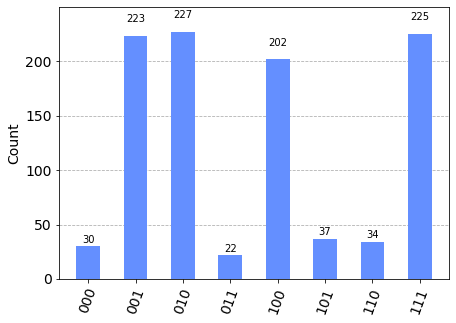

In [122]:
sim = Aer.get_backend('aer_simulator') 
qobj = assemble(circuit)
counts = sim.run(qobj, shots=1000).result().get_counts()
plot_histogram(counts)

#Conclusiones

El histograma muestra que el algoritmo da las posibles soluciones:

(x1, x2, x3) = 0 0 1

(x1, x2, x3) = 0 1 0

(x1, x2, x3) = 1 0 0

(x1, x2, x3) = 1 1 1

por lo tanto se muestra que hay 4 posibles para encontrar el valor verdadero en este problemas SAT utilizando el algoritmo de grover.